In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn import preprocessing 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
(xtrain, ytrain), (xtest, ytest) = keras.datasets.boston_housing.load_data()

xtrain = preprocessing.normalize(xtrain)
xtest = preprocessing.normalize(xtest)

In [3]:
model = Sequential ()
model.add(Dense(128, activation= "relu", input_shape= (xtrain.shape[1],)))
model.add(Dense(64, activation= "relu"))
model.add(Dense(32, activation= "relu"))
model.add(Dense(1))

model.compile(loss="mse", optimizer = "rmsprop", metrics=["mae"])

In [4]:
history= model.fit(xtrain,ytrain, epochs= 100, batch_size=1, verbose=1, validation_data= (xtest, ytest))

Epoch 1/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 296.6579 - mae: 12.7562 - val_loss: 67.6560 - val_mae: 6.0969
Epoch 2/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 91.2680 - mae: 6.7580 - val_loss: 65.9695 - val_mae: 5.7538
Epoch 3/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 64.2177 - mae: 5.6455 - val_loss: 60.1421 - val_mae: 5.5679
Epoch 4/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 55.5959 - mae: 5.1774 - val_loss: 61.3696 - val_mae: 6.1049
Epoch 5/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 59.4148 - mae: 5.3331 - val_loss: 63.4531 - val_mae: 5.5952
Epoch 6/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 66.5012 - mae: 5.5879 - val_loss: 53.3022 - val_mae: 5.2820
Epoch 7/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 47.4013 - mae: 4.8152 - val_loss: 57.2688 - val_mae: 5.3258
Epoch 8/100
404/404 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 50.3544 - mae: 4.8865 - val_loss: 51.0584 - val_mae: 5.0816
Epoch 9/100
404/404 ━━━━━━━━━━

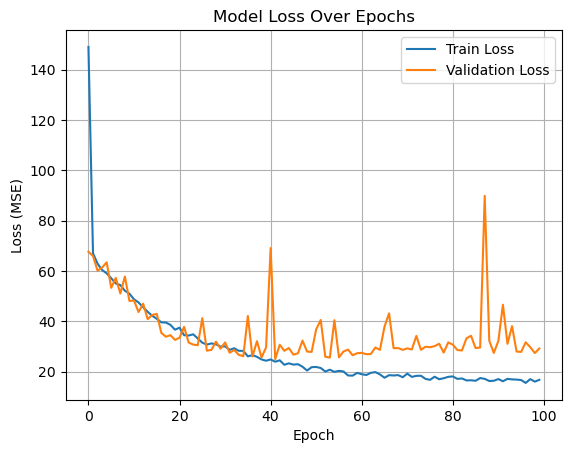

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
test_loss, test_mae= model.evaluate(xtest, ytest)

test_loss, test_mae

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.9536 - mae: 3.3111 


(29.196195602416992, 3.571791648864746)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


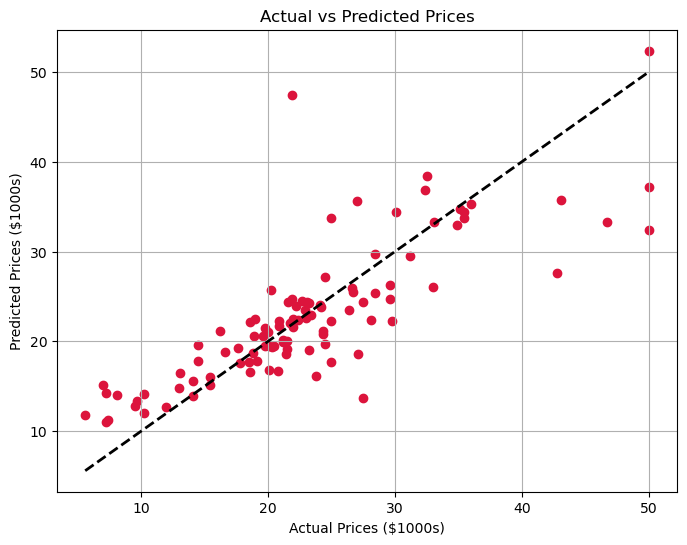

In [7]:
# Predict on test data
Y_pred = model.predict(xtest).flatten()

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(ytest, Y_pred, c='crimson')
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'k--', lw=2)
plt.xlabel('Actual Prices ($1000s)')
plt.ylabel('Predicted Prices ($1000s)')
plt.title('Actual vs Predicted Prices')
plt.grid(True)
plt.show()

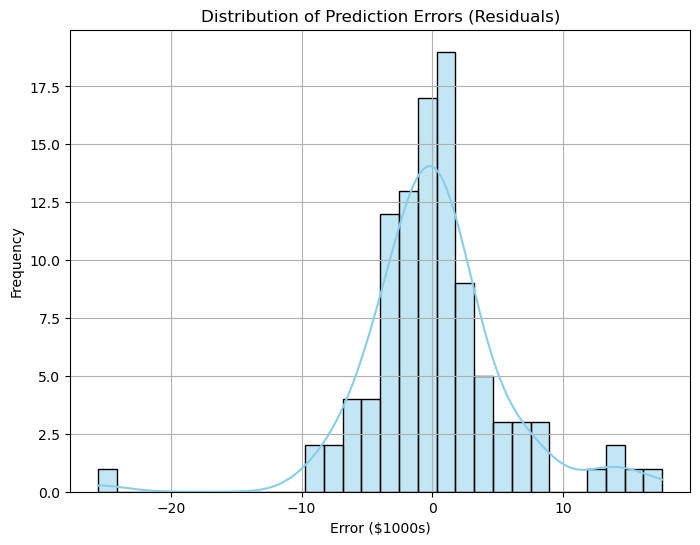

In [8]:
import seaborn as sns

# Residuals
residuals = ytest - Y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='skyblue')
plt.title('Distribution of Prediction Errors (Residuals)')
plt.xlabel('Error ($1000s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

IMDB


In [15]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the dataset, keeping only the top 10,000 most frequent words
num_words = 10000
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = num_words)

import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i,sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)



In [16]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.6984 - loss: 0.6070 - val_accuracy: 0.8734 - val_loss: 0.3862
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9001 - loss: 0.3212 - val_accuracy: 0.8888 - val_loss: 0.2976
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9305 - loss: 0.2160 - val_accuracy: 0.8912 - val_loss: 0.2764
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9476 - loss: 0.1644 - val_accuracy: 0.8912 - val_loss: 0.2805
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9622 - loss: 0.1268 - val_accuracy: 0.8884 - val_loss: 0.2986
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9683 - loss: 0.1080 - val_accuracy: 0.8874 - val_loss: 0.3220
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9771 - loss: 0.0856 - val_accuracy: 0.8848 - val_loss: 0.3449
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9845 - loss: 0.0664 - val_accuracy: 0.8802 - v

In [20]:
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8646 - loss: 0.4728
Test Loss: 0.4784165620803833
Test Accuracy: 0.8638799786567688


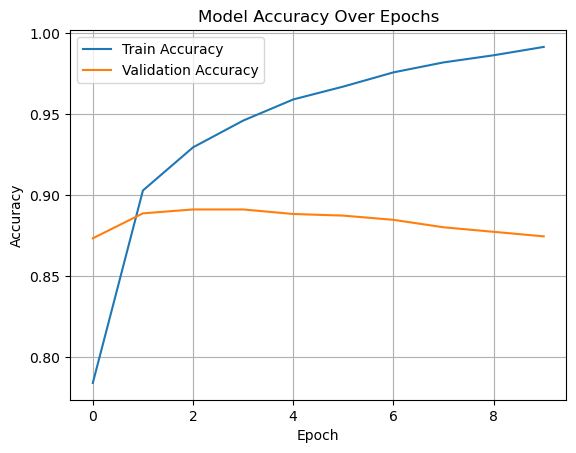

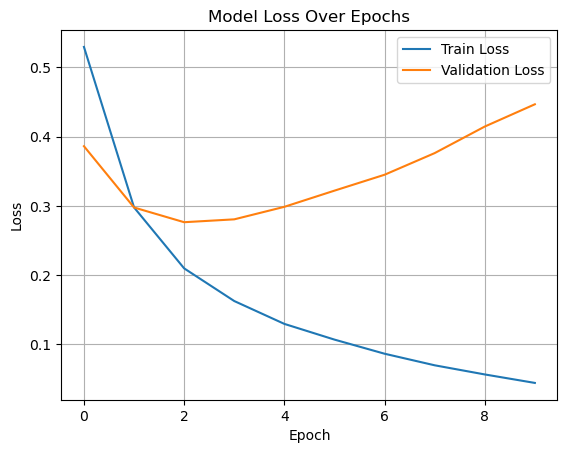

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

exp3


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [23]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape images to add channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [24]:
from tensorflow.keras import models, layers

model = models.Sequential()

# 1) First conv + pool
model.add(layers.Conv2D(32, (3, 3),activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# 2) Second conv + pool
model.add(layers.Conv2D(64, (3, 3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# 3) Third conv layer
model.add(layers.Conv2D(64, (3, 3),activation='relu'))

# 4) Flatten & Dense heads
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.7413 - loss: 0.7110 - val_accuracy: 0.8679 - val_loss: 0.3622
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8790 - loss: 0.3351 - val_accuracy: 0.8786 - val_loss: 0.3361
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.8977 - loss: 0.2783 - val_accuracy: 0.8837 - val_loss: 0.3194
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9090 - loss: 0.2480 - val_accuracy: 0.8989 - val_loss: 0.2774
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9161 - loss: 0.2225 - val_accuracy: 0.9017 - val_loss: 0.2783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.9273 - loss: 0.1985 - val_accuracy: 0.9029 - val_loss: 0.2715
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9314 - loss: 0.1805 - val_accuracy: 0.9081 - val_loss: 0.2585
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9375 -

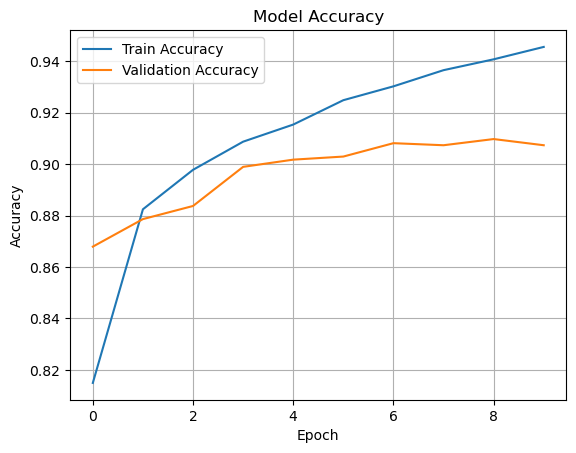

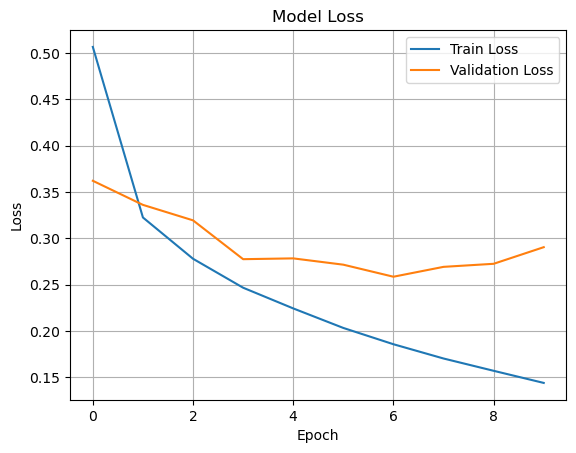

In [26]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 - 3s - 9ms/step - accuracy: 0.9073 - loss: 0.2904

Test accuracy: 0.9073


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


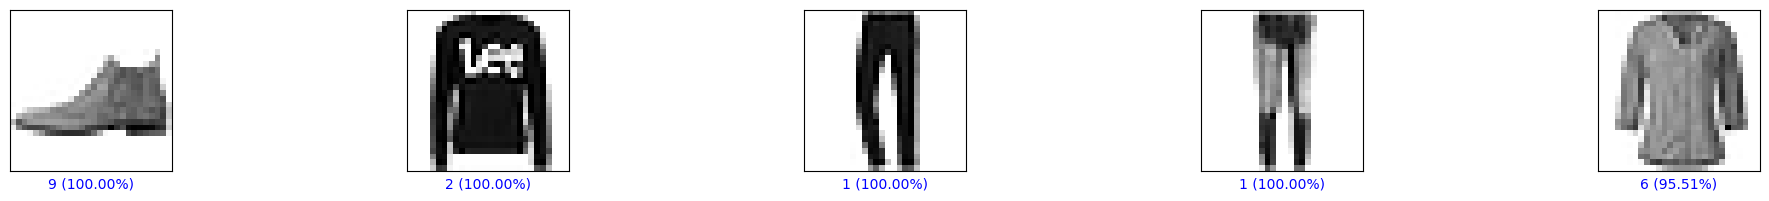

In [28]:
# Predict the labels of the test set
predictions = model.predict(test_images)

# Function to plot images with predicted labels
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.2f}%)", color=color)

# Plot the first 5 test images with predictions
num_rows = 1
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

In [29]:
import json

print(json.dumps(history.history, indent=4))

{
    "accuracy": [
        0.8149499893188477,
        0.8824166655540466,
        0.8977500200271606,
        0.9086833596229553,
        0.9153333306312561,
        0.9247999787330627,
        0.9301833510398865,
        0.9364666938781738,
        0.9406833052635193,
        0.9455000162124634
    ],
    "loss": [
        0.5068211555480957,
        0.32248812913894653,
        0.27787521481513977,
        0.24658437073230743,
        0.22421851754188538,
        0.2031034678220749,
        0.1855054497718811,
        0.1700804978609085,
        0.15679354965686798,
        0.14369159936904907
    ],
    "val_accuracy": [
        0.867900013923645,
        0.878600001335144,
        0.8837000131607056,
        0.8988999724388123,
        0.9017000198364258,
        0.902899980545044,
        0.9081000089645386,
        0.9072999954223633,
        0.9096999764442444,
        0.9072999954223633
    ],
    "val_loss": [
        0.3621554374694824,
        0.33612215518951416,
        